**APPLIED NEURAL NETWORK: Cancer Modelling case**

Neural networks, a fundamental component of machine learning and artificial intelligence, have become increasingly prevalent in various domains, including healthcare, medical research, business, financial trading etc. One such application is the use of neural networks for cancer modeling and analysis.

In cancer modeling case, for instance, neural networks are employed to develop predictive models that can assist healthcare professionals in various aspects of cancer management. These models may be trained on patient data, including medical history, diagnostic test results, genetic information, and treatment outcomes, to learn the underlying patterns and relationships that contribute to the development and progression of cancer.

In this project we would train Neural Network and Gradient Boosting machine learning models on a selected set of data (training data) and test the models perfromance on unseen data (test data).  

In [3]:
# Global import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
# import cancer data
cancer_data = pd.read_csv('cancer_data.csv')
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis(1=m, 0=b)      569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Above, we have cancer data that depicts features with respective classes. The classes are depicted under the column 'diagnosis' with either 'malign = 1' or 'benign = 0'. Our goal is to split the data, model the training data, and prepare our models to predict the classes of unseen data using an XGBoost model and a neural network model.

Fortnunately, we do not have missing values (sigh of relief!), thus we proceed straightaway to modelling!!

In [5]:
cancer_data.head()

,"diagnosis(1=m, 0=b)",radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# select diagnosis column and analyse
diagnosis = cancer_data['diagnosis(1=m, 0=b)']
diagnosis.value_counts()

,count
"diagnosis(1=m, 0=b)",
0,357
1,212


In [7]:
diagnosis.value_counts() / len(diagnosis)
""" The data is not quite disproportionate, 62% for benign and near 40% for malignant\
this will be good for our model """

' The data is not quite disproportionate, 62% for benign and near 40% for malignant\\ \nthis will be good for our model '

In [8]:
# Data description
cancer_data.describe()

,"diagnosis(1=m, 0=b)",radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


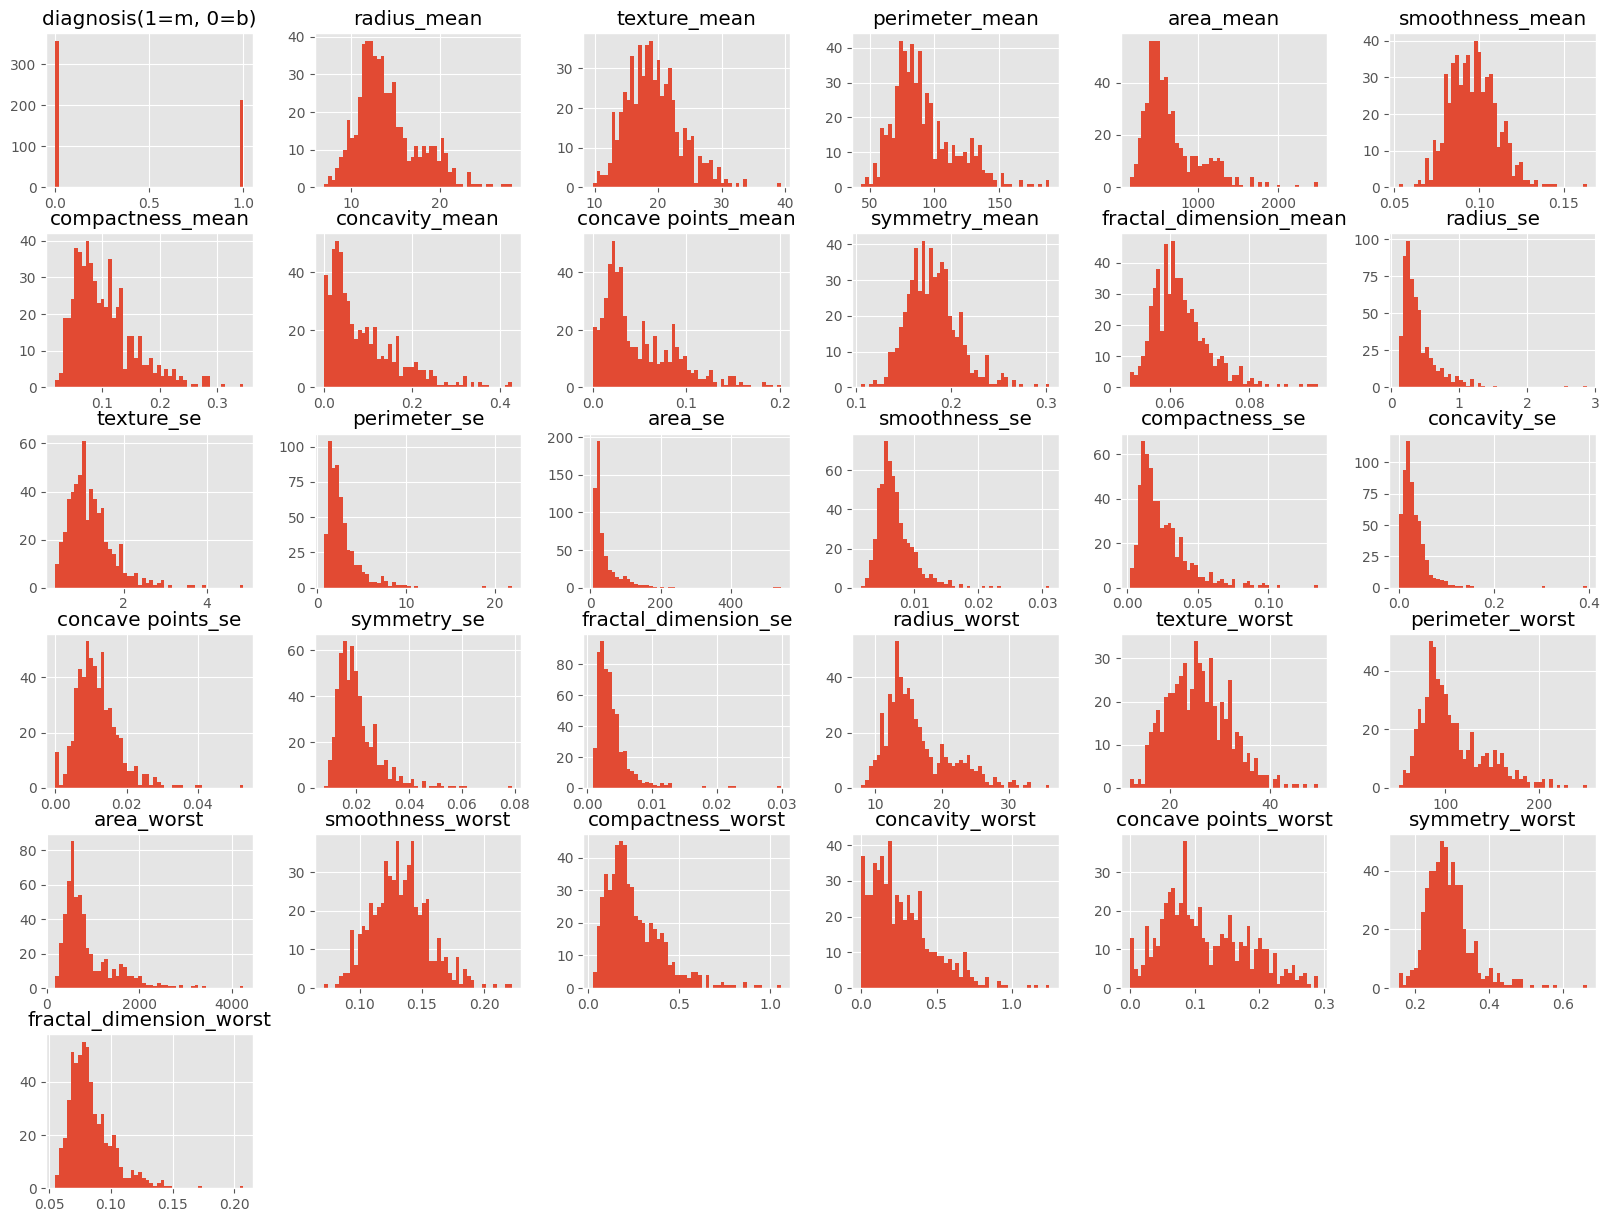

In [9]:
# Create histohrams
cancer_data.hist(bins=50, figsize=(20,15))
plt.show()

Our next plot distinguishes between malign and benign case to provide more insights about the data distribution.

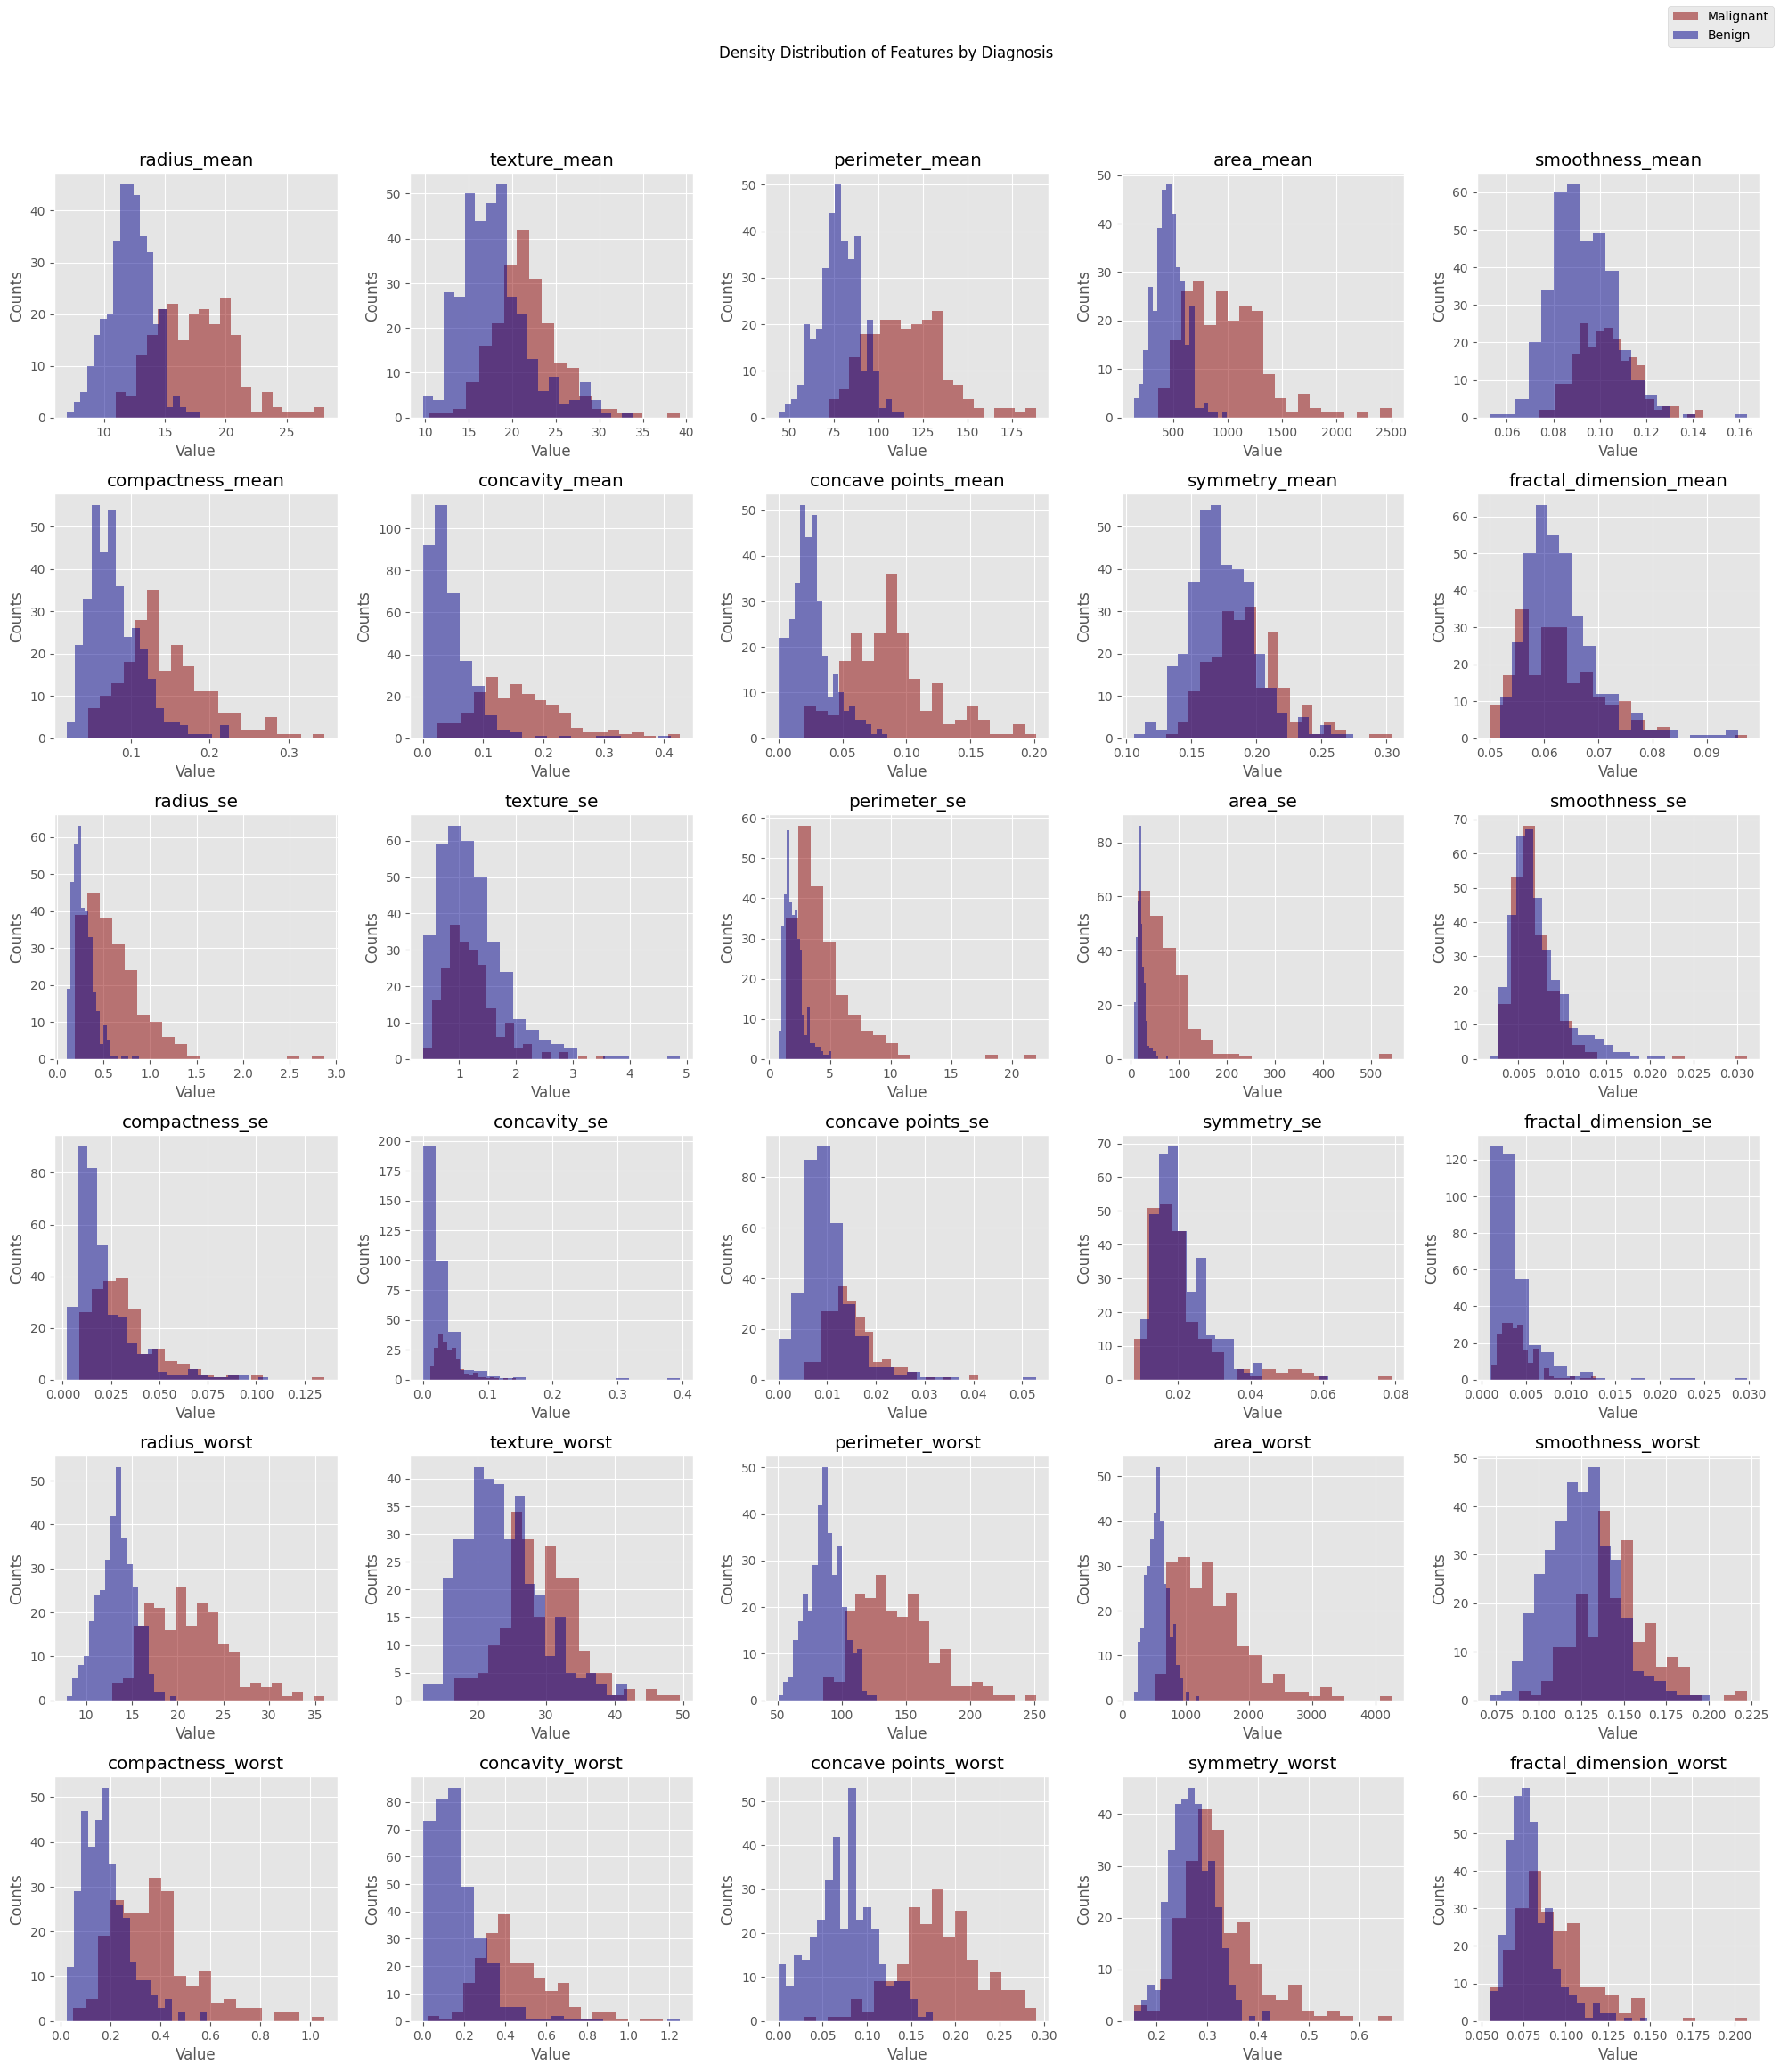

In [10]:
import seaborn as sns
import math

# Get column names except for 'diagnosis(1=m, 0=b)'
feature_columns = cancer_data.columns[1:]

# Determine number of rows and columns for the subplot grid
num_features = len(feature_columns)
num_cols = 5
num_rows = math.ceil(num_features / num_cols)

# Create subplots with the calculated layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4), sharey= False)
axes = axes.flatten()

# Plot each feature column by diagnosis
for i, column in enumerate(feature_columns):
    malignant_data = cancer_data[cancer_data['diagnosis(1=m, 0=b)'] == 1][column]
    benign_data = cancer_data[cancer_data['diagnosis(1=m, 0=b)'] == 0][column]

    # Plot histograms for each diagnosis
    axes[i].hist(malignant_data, bins=20, alpha=0.5, color='darkred', label='Malignant')
    axes[i].hist(benign_data, bins=20, alpha=0.5, color='darkblue', label='Benign')

    # Title and labels
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Counts')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add legend only once and show plot
fig.legend(['Malignant', 'Benign'], loc='upper right')
fig.suptitle('Density Distribution of Features by Diagnosis')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

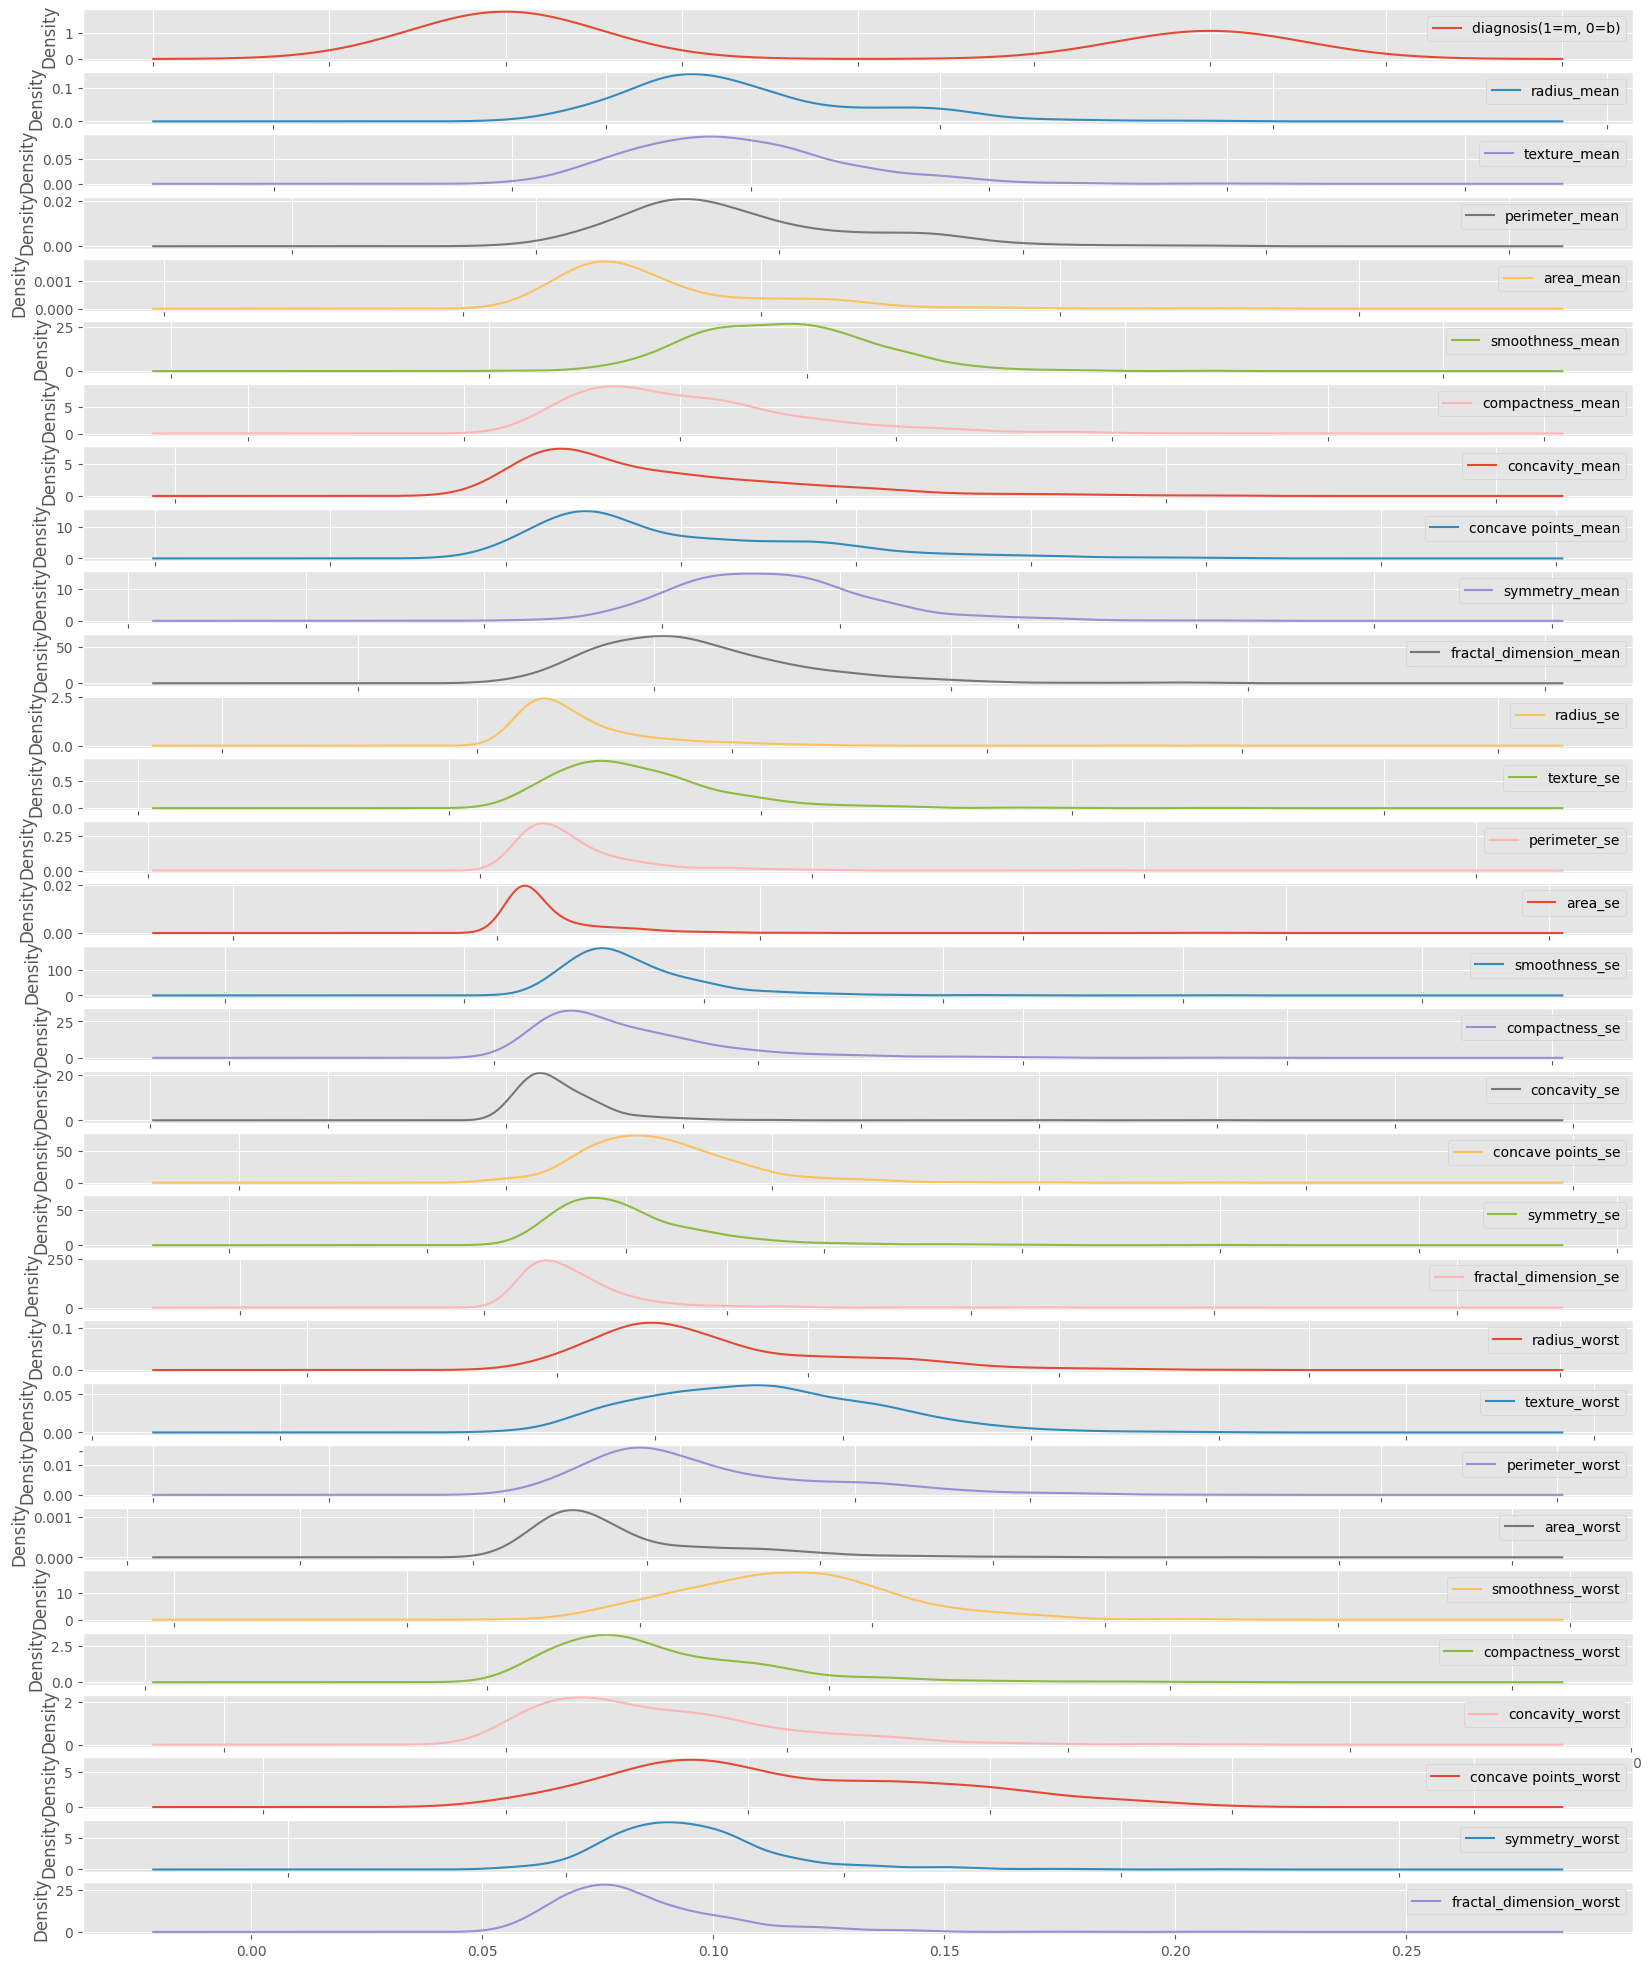

In [11]:
# Kernel density plot for each variable
cancer_data.plot(kind='density', subplots=True, sharex=False, figsize=(20,25))
plt.show()

In [12]:
# Obtain features (X) and outcome/targets (y)
X = cancer_data.drop('diagnosis(1=m, 0=b)', axis=1)
y = cancer_data['diagnosis(1=m, 0=b)']

In [31]:
from sklearn.model_selection import train_test_split

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, # 75% train, 25% test.
                                                    random_state=80,# random seed for repsoducibility
                                                    stratify=y)     # proportion of classes stay the same for train and test set

# **Train Models**

## **Gradient Boosting Model**

Machine Learning learn the function $F$ mapping dataset $X$ to dataset $y$ using a machine learning algorithm with hyperparameters by minimizing the loss function.   

Boosting refers to any machine learning ensemble model that can combine several weak learners into a strong learner. The main idea is train predictors sequentially, each trying to correct the errors of its predecessor.  There exist several boosting models, the the most popular are: **AdaBoosting and Gradient Boosting**. Our focus here will be on implementing Extremme Gradient boosting which works by sequentially adding predictors to an ensemble, each one correcting errors of its predecessor. Moreover, instead of tweaking the instance weights at every iteration like AdaBoost, it tries to fit new predictor to the residual errors made by previuos predictor.

### **Parameters**
There exist several parameters that can be tweaked for model efficiency - hyperparameters, we use them in their default except for the following. we set **n_estimators: 100**, this parameter specifies the number of decision trees (or "weak learners") that will be created in the XGBoost ensemble, trained sequentially in the ensemble. Worthnoting that more trees improves model performance, increases training time and also increases model complexity.
To control the **maximum depth** of the individual decision trees within the XGBoost model, we set parameter to **3**.

The **objective** parameter specifies the learning objective for the XGBoost model. We use **'binary:logistic'** for binary classification tasks, where the outcome variable has two classes (malignant:1 and benign:0). Lastly, **random_state: 75** for reproducibility of results.

In [32]:
## XGB model
import xgboost as xgb

# Create the Extreme Gradient Boosting model
xgb_model = xgb.XGBClassifier( n_estimators= 100,
    maximum_depth= 3,
    objective= 'binary:logistic',
    random_state= 75)

# Fit model
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:18:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "maximum_depth" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              maximum_depth=3, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [33]:
print(f'Training Accuracy, XGB Model: {xgb_model.score(X_train, y_train)}')

Training Accuracy, XGB Model: 1.0


## Neural Network Model
A Neural network is a machine learning model inspired by the structure of the human brain. It consists of interconnected nodes, similar to neurons, that work together to process and learn from data.

Neural networks are particularly useful for tasks such as image recognition, natural language processing, speech recognition, and percentage change/classification prediction in complex, linear and non-linear systems. They are capable of learning and adapting to new data, making them a powerful tool in the field of machine learning and artificial intelligence.

### **Parameters**

**Architecture**: Sequential model with input layer's shape equalled the number of features, the two hidden layers would be **Dense** (fully connected) layers with **280 units** (more the better, but more model training time and more model complexity) and a sigmoid activation function (relevant for this task).Lastly, an output layer of shape one, revealing the predicted class for the inputed set of features.

The model is compiled with the  **'binary_crossentropy' loss function**, which is appropriate for binary classification tasks.

**Optimizer: 'adam'**, which is a popular optimization algorithm for neural networks. **Metric: 'accuracy'**, which will be used to evaluate the model's performance.

The number of **training epochs** is set to 1000, which means the model will go through the training data 1000 times. The **batch size** is set to 100, which means the model will process 100 samples at a time during training.  

In [34]:
import tensorflow as tf

## Create and Fit Neural Network model
# Create Model
model = tf.keras.models.Sequential()

#
model.add(tf.keras.layers.Dense(280, input_shape=X_train.shape[1:], activation='sigmoid'))
model.add(tf.keras.layers.Dense(280, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile model with loss function: Binary cross entropy, optimizer: Adam
# Evaluation metrics: accuracy.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# Fit
model.fit(X_train, y_train, epochs=1000, batch_size=100)

Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5990 - loss: 0.6645
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6274 - loss: 0.6042 
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8197 - loss: 0.5157 
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8664 - loss: 0.4726 
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8809 - loss: 0.3962 
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8997 - loss: 0.3520 
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8965 - loss: 0.3046 
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8947 - loss: 0.2912 
Epoch 9/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9052 - loss: 0.2503 
Epoch 10/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8935 - loss: 0.2551 
Epoch 11/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9208 - loss: 0.2149 
Epoch 12/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0

In [36]:
print(f'Training Accuracy, NN Model: {model.evaluate(X_train, y_train)[1]}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9894 - loss: 0.0309  
Training Accuracy, NN Model: 0.9906103014945984


# Evaluate Model

In [37]:
## Evaluate the model: XGB Model

xgb_model.score(X_test, y_test)

0.965034965034965

In [38]:
## Evaluate the model: Neura Net Model
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9303 - loss: 0.2096 


[0.14730750024318695, 0.9510489702224731]


# Conclusion

In evaluating both the XGBoost (XGB) and Neural Network (NN) models for predicting cancer class on the test dataset, we observe high accuracies: 96.5% for XGBoost and 95.1% for the Neural Network. These high accuracies indicate that both models are performing well at distinguishing between classes: malignant and benign cancer cases.

In [39]:
# The End !